In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time as t
import seaborn as sns
import re,string,math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(df:=pd.read_csv('train.csv')).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
display(df.describe())
display(df.isnull().sum(axis=0))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(['PassengerId','Cabin','Ticket','Fare'],axis=1,inplace=True)
(df:=df.sample(frac=1).reset_index(drop=True)).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,Q
1,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,C
2,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,S
3,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,C
4,1,3,"Moran, Miss. Bertha",female,NaN,1,0,Q


In [5]:
df.Age.fillna(df.Age.mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [6]:
def bar_graph(column):
    survived=df[df["Survived"]==1][column].value_counts()
    dead=df[df["Survived"]==0][column].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=["Survived","Dead"]
    return df1.plot(kind="bar",figsize=(10,5),title=column)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


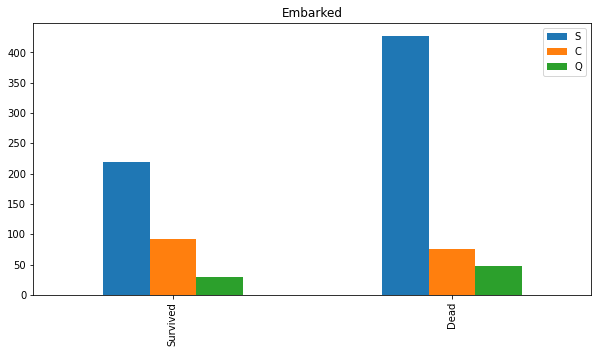

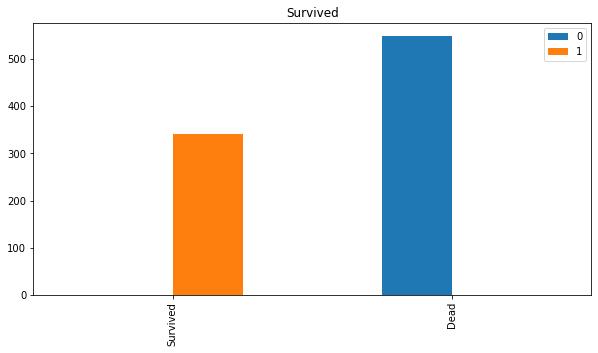

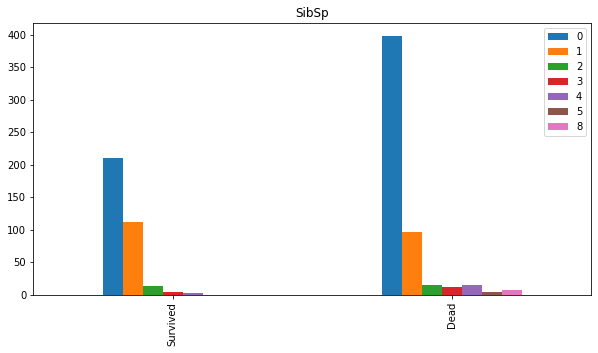

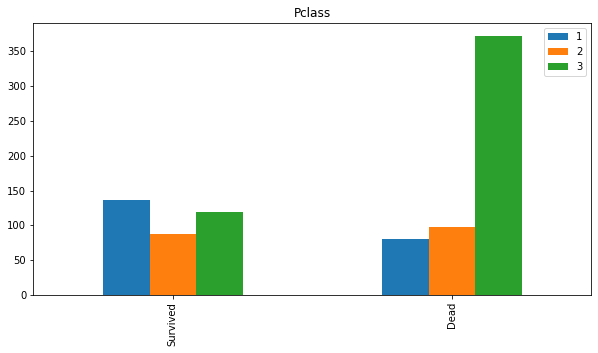

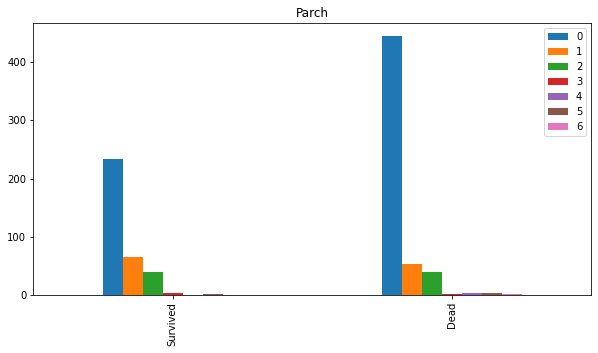

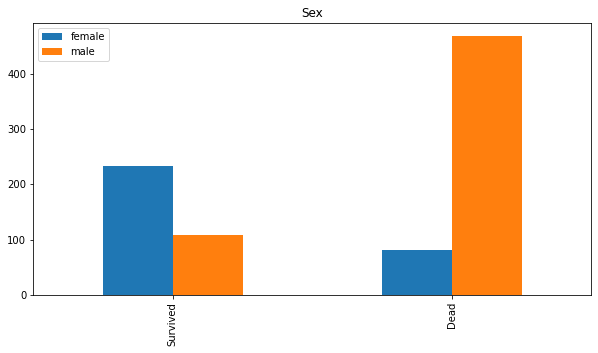

In [7]:
for i in [*(set(df.columns)-set(['Age','Fare','Name']))]:
    print(bar_graph(i))

In [8]:
display((X:=df.iloc[:,1:]).head())
display((Y:=df.iloc[:,0]).head())

,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,Q
1,1,"Newell, Miss. Madeleine",female,31.000000,1,0,C
2,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.000000,0,1,S
3,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.000000,0,0,C
4,3,"Moran, Miss. Bertha",female,29.699118,1,0,Q


0    0
1    1
2    1
3    1
4    1
Name: Survived, dtype: int64

In [9]:
display(df.describe())
display(df.info())

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


None

In [10]:
X.drop(['Name'],axis=1,inplace=True)
X['Sex']=X['Sex'].map({'male': 1, 'female':0})
X['Embarked']=X['Embarked'].map({i:j for j,i in [*enumerate([*X['Embarked'].unique()])]})
X['Age']=np.log(X['Age'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,3.465736,0,0,0
1,1,0,3.433987,1,0,1
2,2,0,3.526361,0,1,2
3,3,0,2.708050,0,0,1
4,3,0,3.391117,1,0,0


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LR = LogisticRegression(random_state=0).fit(X_train,Y_train)

LR.score(X_test,Y_test)

0.8

# Decision Tree Classification

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
DT = DecisionTreeClassifier(random_state=225).fit(X_train, Y_train)

DT.score(X_test,Y_test)

0.7888888888888889

# Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
GBC = GradientBoostingClassifier(random_state=450).fit(X_train, Y_train)

GBC.score(X_test,Y_test)

0.8555555555555555

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RFC=RandomForestClassifier(random_state=675,min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001).fit(X_train, Y_train)

RFC.score(X_test,Y_test)

0.8444444444444444

# Testing

In [20]:
(dfT:=pd.read_csv('test.csv')).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
dfTc=dfT.copy()
dfTc.Age.fillna(dfTc.Age.mean(),inplace=True)
dfTc['Embarked'].fillna(dfTc['Embarked'].mode()[0],inplace=True)
dfTc.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
dfTc.drop(['Name','PassengerId','Cabin','Ticket','Fare'],axis=1,inplace=True)
dfTc['Sex']=dfTc['Sex'].map({'male': 1, 'female':0})
dfTc['Embarked']=dfTc['Embarked'].map({i:j for j,i in [*enumerate([*dfTc['Embarked'].unique()])]})
dfTc['Age']=np.log(dfTc['Age'])
dfTc.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,3.540959,0,0,0
1,3,0,3.850148,1,0,1
2,2,1,4.127134,0,0,0
3,3,1,3.295837,0,0,1
4,3,0,3.091042,1,1,1


In [85]:
dfT['Survived']=[0 if i<0.5 else 1 for i in [*RFC.predict(dfTc)]]

In [86]:
dfT=dfT[['PassengerId','Survived']]

In [87]:
dfT.to_csv('titanic_submission.csv',index=False)